In [1]:
import gurobi as gp
import pandas as pd

## Maximum 300 miles part

In [2]:
pairs = pd.read_csv('pairs.csv')
distances = pd.read_csv('distances.csv')

distances

locations = {}

for i in distances.index:
    locations[(distances['city1'][i], distances['city2'][i])] = distances['distance'][i]
    locations[(distances['city1'][i], distances['city1'][i])] = 0

bloodtypes = {'A':['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB'], 'O': ['A', 'B', 'AB', 'O']}
compatible = []

donors = []
receivers = []
all_pairs = []

for index in pairs.index:
    if pairs['type'][index] == 'donor':
        donors.append(pairs['ID'][index])
    elif pairs['type'][index] == 'receiver':
        receivers.append(pairs['ID'][index])
    else:
        all_pairs.append(pairs['ID'][index])

all_donors = donors + all_pairs
all_receivers = receivers + all_pairs

for i in all_donors:
    donor_blood = pairs['DBT'][i-1]
    donor_location = pairs['Location'][i-1]
    donor_age = pairs['Dage'][i-1]
    for j in all_receivers:
        receiver_blood = pairs['RBT'][j-1]
        receiver_location = pairs['Location'][j-1]
        receiver_age = pairs['Rage'][j-1]
        if receiver_blood in bloodtypes[donor_blood] and abs(int(donor_age) - int(receiver_age)) <= abs(10) and locations[(donor_location, receiver_location)] <= 300:
            compatible.append((i, j))
       

In [3]:
# Question 4a
model = gp.Model()

x = model.addVars(compatible, vtype = gp.GRB.BINARY, name=" ")
model.setObjective(gp.quicksum(x[p] for p in compatible), gp.GRB.MAXIMIZE)

# each pair can only give out a kidney if it also recieves one, but can get one from an independant donor without giving one away
for j in all_pairs:
    model.addConstr(gp.quicksum(x[set_] for set_ in compatible if set_[1] == j) >= gp.quicksum(x[set_] for set_ in compatible if set_[0] == j))
# each donor and recipient can only give/receive one kidney
for donator in all_donors:
    model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[0] == donator) <= 1)
for receiver in all_receivers:
    model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[1] == receiver) <= 1)

model.optimize()
print("optimal value",model.objval)
model.printAttr("X")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-28
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 392 rows, 896 columns and 2932 nonzeros
Model fingerprint: 0x264f0e7f
Variable types: 0 continuous, 896 integer (896 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 52.0000000
Presolve removed 205 rows and 211 columns
Presolve time: 0.02s
Presolved: 187 rows, 685 columns, 2200 nonzeros
Found heuristic solution: objective 78.0000000
Variable types: 0 continuous, 685 integer (685 binary)

Root relaxation: objective 9.400000e+01, 233 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

In [4]:
# Question 4b
var_names = []
var_values = []

for var in model.getVars():
    if var.X > 0: 
        var_names.append(str(var.varName))
        var_values.append(var.X)

better = []
for x in range(len(var_names)):
    variable = var_names[x].lstrip(" '[")
    varible=variable[:-1]
    better.append(variable)

In [5]:
#pair vs receiver
unpaired=0
paired=0
for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[1][:-1])-1][1]=="pair":
        paired=paired+1
    else:
        unpaired=unpaired+1

total_paired=0
total_unpaired=0
for x in range(200):
    if pairs.iloc[x][1]=="pair":
        total_paired=1+total_paired
    elif pairs.iloc[x][1]=="receiver":
        total_unpaired=total_unpaired+1
        
print(unpaired/total_unpaired)
print(paired/total_paired)

0.2375
0.78125


In [6]:
# Question 4c
total_donors=0
for x in range(200):
    if pairs.iloc[x][1]=="donor":
        total_donors=1+total_donors

paired_donors=0
for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[0])-1][1]=="donor":
        paired_donors=paired_donors+1

print(paired_donors/total_donors)

0.9166666666666666


0.8617021276595744


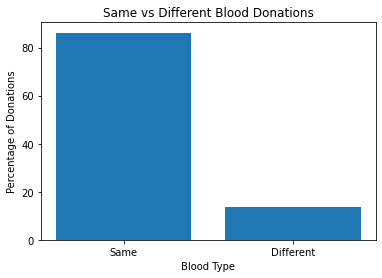

In [7]:
# Question 4d
same_blood=0
for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[1][:-1])-1][2]==pairs.iloc[int(better[x].split(",")[0])-1][3]:
        same_blood=1+same_blood
print(same_blood/len(better))

import matplotlib.pyplot as plt

x = ["Same","Different"]
y = [(same_blood/len(better))*100,((len(better)-same_blood)/len(better))*100]

plt.bar(x, y)
plt.title('Same vs Different Blood Donations')
plt.xlabel('Blood Type')
plt.ylabel('Percentage of Donations')
plt.rcParams["figure.figsize"] = (5, 2)
plt.show()

In [8]:
# Question 4e
madrid=0
frankfurt=0
istanbul=0
amsterdam=0
paris=0
dublin=0
moscow=0
rome=0
zürich=0
düsseldorf=0
milan=0
copenhagen=0
vienna=0
manchester=0
palma_de_mallorca=0
oslo=0
lisbon=0


for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Madrid":
        madrid=madrid+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Frankfurt":
        frankfurt=frankfurt+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Istanbul":
        istanbul=istanbul+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Amsterdam":
        amsterdam=amsterdam+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Paris":
        paris=paris+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Dublin":
        dublin=dublin+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Moscow":
        moscow=moscow+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Rome":
        rome=rome+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Zürich":
        zürich=zürich+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Milan":
        milan=milan+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Düsseldorf":
        düsseldorf=düsseldorf+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Copenhagen":
        copenhagen=copenhagen+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Vienna":
        vienna=vienna+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Manchester":
        manchester=manchester+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Palma de Mallorca":
        palma_de_mallorca=palma_de_mallorca+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Oslo":
        oslo=oslo+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Lisbon":
        lisbon=lisbon+1
        

In [9]:
total_madrid=0
total_frankfurt=0
total_istanbul=0
total_amsterdam=0
total_paris=0
total_dublin=0
total_moscow=0
total_rome=0
total_zürich=0
total_düsseldorf=0
total_milan=0
total_copenhagen=0
total_vienna=0
total_manchester=0
total_palma_de_mallorca=0
total_oslo=0
total_lisbon=0

total_all=0

for x in range(len(pairs)):
    if pairs.type[x] == "receiver" and pairs.Location[x] == "Madrid":
        total_madrid=total_madrid+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Madrid":
        total_madrid=total_madrid+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Frankfurt":
        total_frankfurt=total_frankfurt+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Frankfurt":
        total_frankfurt=total_frankfurt+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Istanbul":
        total_istanbul=total_istanbul+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Istanbul":
        total_istanbul=total_istanbul+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Amsterdam":
        total_amsterdam=total_amsterdam+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Amsterdam":
        total_amsterdam=total_amsterdam+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Paris":
        total_paris=total_paris+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Paris":
        total_paris=total_paris+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Dublin":
        total_dublin=total_dublin+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Dublin":
        total_dublin=total_dublin+1    
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Moscow":
        total_moscow=total_moscow+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Moscow":
        total_moscow=total_moscow+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Rome":
        total_rome=total_rome+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Rome":
        total_rome=total_rome+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Zürich":
        total_zürich=total_zürich+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Zürich":
        total_zürich=total_zürich+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Düsseldorf":
        total_düsseldorf=total_düsseldorf+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Düsseldorf":
        total_düsseldorf=total_düsseldorf+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Milan":
        total_milan=total_milan+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Milan":
        total_milan=total_milan+1       
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Copenhagen":
        total_copenhagen=total_copenhagen+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Copenhagen":
        total_copenhagen=total_copenhagen+1  
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Vienna":
        total_vienna=total_vienna+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Vienna":
        total_vienna=total_vienna+1  
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Manchester":
        total_manchester=total_manchester+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Manchester":
        total_manchester=total_manchester+1 
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Palma de Mallorca":
        total_palma_de_mallorca=total_palma_de_mallorca+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Palma de Mallorca":
        total_palma_de_mallorca=total_palma_de_mallorca+1 
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Oslo":
        total_oslo=total_oslo+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Oslo":
        total_oslo=total_oslo+1
    elif pairs.type[x] == "receiver" and pairs.Location[x] == "Lisbon":
        total_lisbon=total_lisbon+1
    elif pairs.type[x] == "pair" and pairs.Location[x] == "Lisbon":
        total_lisbon=total_lisbon+1

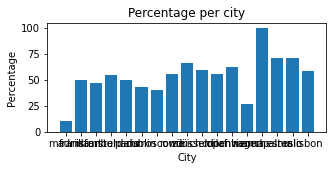

In [10]:
x = ["madrid","frankfurt","istanbul","amsterdam","paris","dublin","moscow","rome","zürich","düsseldorf","milan","copenhagen","vienna","manchester","palma","oslo","lisbon"]
y = [(madrid/total_madrid)*100,(frankfurt/total_frankfurt)*100,(istanbul/total_istanbul)*100,(amsterdam/total_amsterdam)*100,
     (paris/total_paris)*100,(dublin/total_dublin)*100,(moscow/total_moscow)*100,(rome/total_rome)*100,(zürich/total_zürich)*100,
     (düsseldorf/total_düsseldorf)*100,(milan/total_milan)*100,(copenhagen/total_copenhagen)*100,(vienna/total_vienna)*100,
     (manchester/total_manchester)*100,(palma_de_mallorca/total_palma_de_mallorca)*100,(oslo/total_oslo)*100,(lisbon/total_lisbon)*100]

plt.bar(x, y)
plt.title('Percentage per city')
plt.xlabel('City')
plt.ylabel('Percentage')
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

## Maximum 500 miles part

In [11]:
pairs = pd.read_csv('pairs.csv')
distances = pd.read_csv('distances.csv')

locations = {}

for i in distances.index:
    locations[(distances['city1'][i], distances['city2'][i])] = distances['distance'][i]
    locations[(distances['city1'][i], distances['city1'][i])] = 0

bloodtypes = {'A':['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB'], 'O': ['A', 'B', 'AB', 'O']}
compatible = []

donors = []
receivers = []
all_pairs = []

for index in pairs.index:
    if pairs['type'][index] == 'donor':
        donors.append(pairs['ID'][index])
    elif pairs['type'][index] == 'receiver':
        receivers.append(pairs['ID'][index])
    else:
        all_pairs.append(pairs['ID'][index])

all_donors = donors + all_pairs
all_receivers = receivers + all_pairs

for i in all_donors:
    donor_blood = pairs['DBT'][i-1]
    donor_location = pairs['Location'][i-1]
    donor_age = pairs['Dage'][i-1]
    for j in all_receivers:
        receiver_blood = pairs['RBT'][j-1]
        receiver_location = pairs['Location'][j-1]
        receiver_age = pairs['Rage'][j-1]
        if receiver_blood in bloodtypes[donor_blood] and abs(int(donor_age) - int(receiver_age)) <= abs(10) and locations[(donor_location, receiver_location)] <= 500:
            compatible.append((i, j))

In [12]:
# Question 5a
model = gp.Model()

x = model.addVars(compatible, vtype = gp.GRB.BINARY, name=" ")
model.setObjective(gp.quicksum(x[p] for p in compatible), gp.GRB.MAXIMIZE)

# each pair can only give out a kidney if it also recieves one, but can get one from an independant donor without giving one away
for j in all_pairs:
    model.addConstr(gp.quicksum(x[set_] for set_ in compatible if set_[1] == j) >= gp.quicksum(x[set_] for set_ in compatible if set_[0] == j))
# each donor can only give one kidney
for donator in all_donors:
    model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[0] == donator) <= 1)
for receiver in all_receivers:
    model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[1] == receiver) <= 1)

model.optimize()
print("optimal value",model.objval)
model.printAttr("X")

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 392 rows, 1594 columns and 5231 nonzeros
Model fingerprint: 0xfd8a5627
Variable types: 0 continuous, 1594 integer (1594 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 51.0000000
Presolve removed 147 rows and 176 columns
Presolve time: 0.04s
Presolved: 245 rows, 1418 columns, 4591 nonzeros
Found heuristic solution: objective 82.0000000
Variable types: 0 continuous, 1418 integer (1418 binary)

Root relaxation: objective 1.050000e+02, 271 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     105.0000000  105.

In [13]:
# Question 5b
var_names = []
var_values = []

for var in model.getVars():
    if var.X > 0: 
        var_names.append(str(var.varName))
        var_values.append(var.X)

better = []
for x in range(len(var_names)):
    variable = var_names[x].lstrip(" '[")
    varible=variable[:-1]
    better.append(variable)

In [14]:
#pair vs receiver
unpaired=0
paired=0
for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[1][:-1])-1][1]=="pair":
        paired=paired+1
    else:
        unpaired=unpaired+1

total_paired=0
total_unpaired=0
for x in range(200):
    if pairs.iloc[x][1]=="pair":
        total_paired=1+total_paired
    elif pairs.iloc[x][1]=="receiver":
        total_unpaired=total_unpaired+1
        
print(unpaired/total_unpaired)
print(paired/total_paired)

0.275
0.8645833333333334


In [15]:
# Question 5c
total_donors=0
for x in range(200):
    if pairs.iloc[x][1]=="donor":
        total_donors=1+total_donors

paired_donors=0
for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[0])-1][1]=="donor":
        paired_donors=paired_donors+1

print(paired_donors/total_donors)

0.9583333333333334


0.8952380952380953


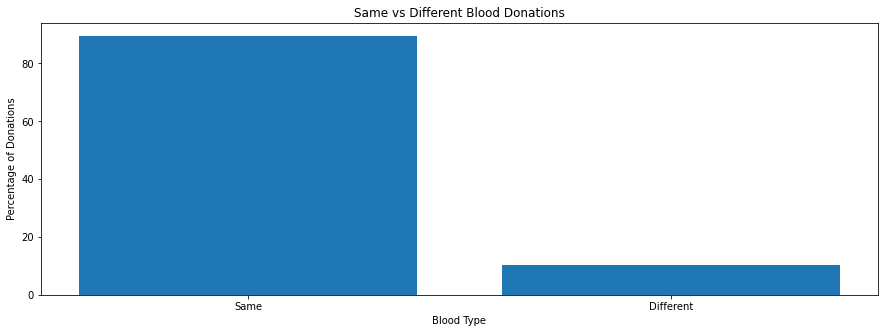

In [16]:
# Question 5d
same_blood=0
for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[1][:-1])-1][2]==pairs.iloc[int(better[x].split(",")[0])-1][3]:
        same_blood=1+same_blood
print(same_blood/len(better))

import matplotlib.pyplot as plt

x = ["Same","Different"]
y = [(same_blood/len(better))*100,((len(better)-same_blood)/len(better))*100]

plt.bar(x, y)
plt.title('Same vs Different Blood Donations')
plt.xlabel('Blood Type')
plt.ylabel('Percentage of Donations')
plt.rcParams["figure.figsize"] = (5, 2)
plt.show()

In [19]:
# Question 5e
madrid=0
frankfurt=0
istanbul=0
amsterdam=0
paris=0
dublin=0
moscow=0
rome=0
zürich=0
düsseldorf=0
milan=0
copenhagen=0
vienna=0
manchester=0
palma_de_mallorca=0
oslo=0
lisbon=0


for x in range(len(better)):
    if pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Madrid":
        madrid=madrid+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Frankfurt":
        frankfurt=frankfurt+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Istanbul":
        istanbul=istanbul+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Amsterdam":
        amsterdam=amsterdam+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Paris":
        paris=paris+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Dublin":
        dublin=dublin+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Moscow":
        moscow=moscow+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Rome":
        rome=rome+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Zürich":
        zürich=zürich+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Milan":
        milan=milan+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Düsseldorf":
        düsseldorf=düsseldorf+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Copenhagen":
        copenhagen=copenhagen+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Vienna":
        vienna=vienna+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Manchester":
        manchester=manchester+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Palma de Mallorca":
        palma_de_mallorca=palma_de_mallorca+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Oslo":
        oslo=oslo+1
    elif pairs.iloc[int(better[x].split(",")[1][:-1])-1][6]=="Lisbon":
        lisbon=lisbon+1

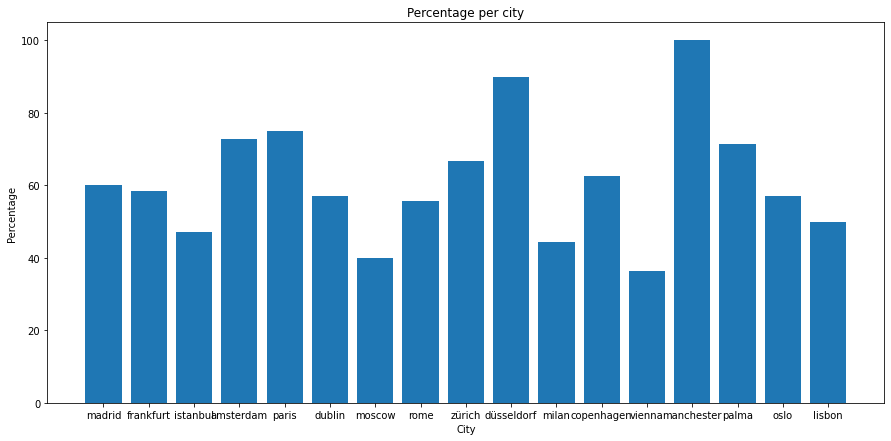

In [20]:
x = ["madrid","frankfurt","istanbul","amsterdam","paris","dublin","moscow","rome","zürich","düsseldorf","milan","copenhagen","vienna","manchester","palma","oslo","lisbon"]
y = [(madrid/total_madrid)*100,(frankfurt/total_frankfurt)*100,(istanbul/total_istanbul)*100,(amsterdam/total_amsterdam)*100,
     (paris/total_paris)*100,(dublin/total_dublin)*100,(moscow/total_moscow)*100,(rome/total_rome)*100,(zürich/total_zürich)*100,
     (düsseldorf/total_düsseldorf)*100,(milan/total_milan)*100,(copenhagen/total_copenhagen)*100,(vienna/total_vienna)*100,
     (manchester/total_manchester)*100,(palma_de_mallorca/total_palma_de_mallorca)*100,(oslo/total_oslo)*100,(lisbon/total_lisbon)*100]

plt.bar(x, y)
plt.title('Percentage per city')
plt.xlabel('City')
plt.ylabel('Percentage')
plt.rcParams["figure.figsize"] = (15, 7)
plt.show()

## Question 2

In [21]:
import gurobipy as gp
import pandas as pd

pairs = pd.read_csv('pairs.csv')
distances = pd.read_csv('distances.csv')

distances

locations = {}

for i in distances.index:
    locations[(distances['city1'][i], distances['city2'][i])] = distances['distance'][i]
    locations[(distances['city1'][i], distances['city1'][i])] = 0

bloodtypes = {'A':['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB'], 'O': ['A', 'B', 'AB', 'O']}
compatible = []

donors = []
receivers = []
all_pairs = []

for index in pairs.index:
    if pairs['type'][index] == 'donor':
        donors.append(pairs['ID'][index])
    elif pairs['type'][index] == 'receiver':
        receivers.append(pairs['ID'][index])
    else:
        all_pairs.append(pairs['ID'][index])

all_donors = donors + all_pairs
all_receivers = receivers + all_pairs

for i in all_donors:
    donor_blood = pairs['DBT'][i-1]
    donor_location = pairs['Location'][i-1]
    donor_age = pairs['Dage'][i-1]
    for j in all_receivers:
        receiver_blood = pairs['RBT'][j-1]
        receiver_location = pairs['Location'][j-1]
        receiver_age = pairs['Rage'][j-1]
        if receiver_blood in bloodtypes[donor_blood] and abs(int(donor_age) - int(receiver_age)) <= abs(10) and locations[(donor_location, receiver_location)] <= 300:
            compatible.append((i, j))

In [25]:
model = gp.Model()

x = model.addVars(compatible, vtype = gp.GRB.BINARY, name=" ")
model.setObjective(gp.quicksum(x[p] for p in compatible), gp.GRB.MAXIMIZE)

# each pair can only give out a kidney if it also recieves one, but can get one from an independant donor without giving one away
for j in all_pairs:
    model.addConstr(gp.quicksum(x[set_] for set_ in compatible if set_[1] == j) >= gp.quicksum(x[set_] for set_ in compatible if set_[0] == j))
# each donor can only give one kidney
for donator in all_donors:
    model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[0] == donator) <= 1)
for receiver in all_receivers:
    model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[1] == receiver) <= 1)


model.optimize()

var_names = []
var_values = []

for var in model.getVars():
    if var.X > 0: 
        var_names.append(str(var.varName))
        var_values.append(var.X)

better = []
for y in range(len(var_names)):
    variable = var_names[y].lstrip(" '[")
    variable=variable[:-1]
    better.append(variable)

active_connections = []
for combo in better:
    set_split = combo.split(',')
    active_connections.append(set_split)

for l in active_connections:
    l[0] = int(l[0])
    l[1] = int(l[1])
    
longest_chain_count = 0
longest_chain_list = []
for flow in active_connections:
    chain_count = 0
    chain_list = []
    chain_list.append(flow)
    looped = False
    start_donor = flow[0]
    receiver= flow[1]
    while receiver in [i[0] for i in active_connections] and looped == False:
        donor = receiver
        receiver = [i[1] for i in active_connections if i[0] == donor][0]
        chain_count += 1
        if donor == start_donor:
            looped = True
        else:
            chain_list.append([donor, receiver])
    if chain_count > longest_chain_count:
        longest_chain_count = chain_count
        longest_chain_list = chain_list
        

chains_bigger_than_three = []
for flow in active_connections:
    chain_count = 0
    chain_list = []
    chain_list.append(flow)
    looped = False
    start_donor = flow[0]
    receiver= flow[1]
    while receiver in [i[0] for i in active_connections] and looped == False:
        donor = receiver
        receiver = [i[1] for i in active_connections if i[0] == donor][0]
        chain_count += 1
        if donor == start_donor:
            looped = True
        else:
            chain_list.append([donor, receiver])
    if chain_count > 3:
        chains_bigger_than_three.append(chain_list)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 392 rows, 896 columns and 2932 nonzeros
Model fingerprint: 0x264f0e7f
Variable types: 0 continuous, 896 integer (896 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 52.0000000
Presolve removed 205 rows and 211 columns
Presolve time: 0.02s
Presolved: 187 rows, 685 columns, 2200 nonzeros
Found heuristic solution: objective 78.0000000
Variable types: 0 continuous, 685 integer (685 binary)

Root relaxation: objective 9.400000e+01, 233 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      94.0000000   94.00000 

In [26]:
print(longest_chain_count)
print(longest_chain_list)

7
[[105, 161], [161, 81], [81, 60], [60, 108], [108, 171], [171, 111], [111, 84], [84, 101]]


In [27]:
print(chains_bigger_than_three)

[[[105, 161], [161, 81], [81, 60], [60, 108], [108, 171], [171, 111], [111, 84], [84, 101]], [[172, 185], [185, 164], [164, 10], [10, 45], [45, 118]], [[60, 108], [108, 171], [171, 111], [111, 84], [84, 101]], [[81, 60], [60, 108], [108, 171], [171, 111], [111, 84], [84, 101]], [[161, 81], [81, 60], [60, 108], [108, 171], [171, 111], [111, 84], [84, 101]]]


In [28]:
def big(brain):
    model = gp.Model()
    x = model.addVars(compatible, vtype = gp.GRB.BINARY, name=" ")
    model.setObjective(gp.quicksum(x[p] for p in compatible), gp.GRB.MAXIMIZE)

    for j in all_pairs:
        model.addConstr(gp.quicksum(x[set_] for set_ in compatible if set_[1] == j) >= gp.quicksum(x[set_] for set_ in compatible if set_[0] == j))
    for donator in all_donors:
        model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[0] == donator) <= 1)
    for receiver in all_receivers:
        model.addConstr(gp.quicksum(x[set_] for set_ in x if set_[1] == receiver) <= 1)

    for selected_chain in brain:
        long = len(selected_chain)
        for martijn in range(long-3):
            model.addConstr(gp.quicksum(x[pepijn[0],pepijn[1]] for pepijn in selected_chain[martijn:martijn+4]) <= 3)
    model.optimize()
    var_names = []
    var_values = []

    for var in model.getVars():
        if var.X > 0: 
            var_names.append(str(var.varName))
            var_values.append(var.X)

    better = []
    for y in range(len(var_names)):
        variable = var_names[y].lstrip(" '[")
        variable=variable[:-1]
        better.append(variable)

    active_connections = []
    for combo in better:
        set_split = combo.split(',')
        active_connections.append(set_split)

    for l in active_connections:
        l[0] = int(l[0])
        l[1] = int(l[1])
        
    current_issues=[]
    for flow in active_connections:
        chain_count = 0
        chain_list = []
        chain_list.append(flow)
        looped = False
        start_donor = flow[0]
        receiver= flow[1]
        while receiver in [i[0] for i in active_connections] and looped == False:
            donor = receiver
            receiver = [i[1] for i in active_connections if i[0] == donor][0]
            chain_count += 1
            if donor == start_donor:
                looped = True
            else:
                chain_list.append([donor, receiver])
        if chain_count > 3:
            chains_bigger_than_three.append(chain_list)
            current_issues.append(chain_list)
    if current_issues==[]:
        model.optimize()
        print("optimal value",model.objval)
        model.printAttr("X")
        print(model.NumConstrs)

        for eran in model.getVars():
            if eran.X > 0: 
                final_names.append(str(eran.varName))
                final_values.append(eran.X)
    else:
        big(chains_bigger_than_three)


In [29]:
final_names = []
final_values = []
big(chains_bigger_than_three)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 408 rows, 896 columns and 2996 nonzeros
Model fingerprint: 0x8bfee9f8
Variable types: 0 continuous, 896 integer (896 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 52.0000000
Presolve removed 214 rows and 211 columns
Presolve time: 0.06s
Presolved: 194 rows, 685 columns, 2228 nonzeros
Found heuristic solution: objective 78.0000000
Variable types: 0 continuous, 685 integer (685 binary)

Root relaxation: objective 9.400000e+01, 186 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      94.0000000   94.00000 

In [30]:
big(chains_bigger_than_three)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 4817 rows, 896 columns and 20632 nonzeros
Model fingerprint: 0x93db9a8c
Variable types: 0 continuous, 896 integer (896 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 52.0000000
Presolve removed 2907 rows and 211 columns
Presolve time: 0.09s
Presolved: 1910 rows, 685 columns, 9092 nonzeros
Found heuristic solution: objective 78.0000000
Variable types: 0 continuous, 685 integer (685 binary)

Root relaxation: objective 9.400000e+01, 207 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                      94.0000000  725.00

In [33]:
#check if it works
better = []
for x in range(len(final_names)):
    variable = final_names[x].lstrip(" '[")
    variable=variable[:-1]
    better.append(variable)
active_connections = []
for combo in better:
    set_split = combo.split(',')
    active_connections.append(set_split)

for l in active_connections:
    l[0] = int(l[0])
    l[1] = int(l[1])
for combo in active_connections:
    if combo[0] == combo[1]:
        active_connections.remove(combo)
longest_chain_count = 0
longest_chain_list = []
for flow in active_connections:
    chain_count = 0
    chain_list = []
    chain_list.append(flow)
    looped = False
    start_donor = flow[0]
    receiver= flow[1]
    while receiver in [i[0] for i in active_connections] and looped == False:
        donor = receiver
        receiver = [i[1] for i in active_connections if i[0] == donor][0]
        chain_count += 1
        if donor == start_donor:
            looped = True
        else:
            chain_list.append([donor, receiver])
    if chain_count > longest_chain_count:
        longest_chain_count = chain_count
        longest_chain_list = chain_list
if longest_chain_count<=3:
    print("OMG it works!")
print(longest_chain_count)
print(longest_chain_list)

OMG it works!
3
[[14, 164], [164, 10], [10, 185], [185, 75]]
